In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df_dum = pd.get_dummies(data = df.drop(['customerID','Churn'],axis = 1),drop_first=True)

In [6]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   bool   
 5   Partner_Yes                            7032 non-null   bool   
 6   Dependents_Yes                         7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_No phone service         7032 non-null   bool   
 9   MultipleLines_Yes                      7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool   
 11  Inte

In [7]:
df, df_notdum = df_dum, df

In [8]:
df['Churn'] = df_notdum['Churn']

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.isnull().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

<Axes: xlabel='Churn', ylabel='count'>

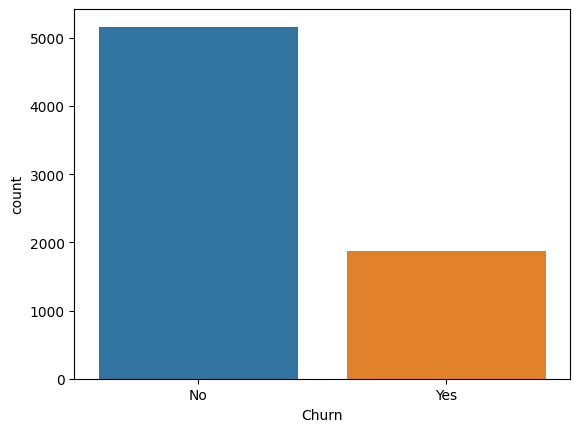

In [11]:
sns.countplot(data=df,x='Churn',hue='Churn')

In [12]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [15]:
from sklearn.ensemble import RandomForestClassifier
#начнем с лесов

In [16]:
randforest_class_model = RandomForestClassifier()

In [17]:
param_grid1 = {'n_estimators':(20,50,100,300,500),
               'max_depth':(1,10,50,100,500,1000,5000)}

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
grid_randforest_class_model = GridSearchCV(estimator=randforest_class_model, param_grid=param_grid1, verbose=4)

In [20]:
grid_randforest_class_model.fit(X,y)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ......max_depth=1, n_estimators=20;, score=0.734 total time=   0.0s
[CV 2/5] END ......max_depth=1, n_estimators=20;, score=0.734 total time=   0.0s
[CV 3/5] END ......max_depth=1, n_estimators=20;, score=0.735 total time=   0.0s
[CV 4/5] END ......max_depth=1, n_estimators=20;, score=0.734 total time=   0.0s
[CV 5/5] END ......max_depth=1, n_estimators=20;, score=0.734 total time=   0.0s
[CV 1/5] END ......max_depth=1, n_estimators=50;, score=0.734 total time=   0.1s
[CV 2/5] END ......max_depth=1, n_estimators=50;, score=0.734 total time=   0.1s
[CV 3/5] END ......max_depth=1, n_estimators=50;, score=0.735 total time=   0.1s
[CV 4/5] END ......max_depth=1, n_estimators=50;, score=0.734 total time=   0.1s
[CV 5/5] END ......max_depth=1, n_estimators=50;, score=0.734 total time=   0.1s
[CV 1/5] END .....max_depth=1, n_estimators=100;, score=0.734 total time=   0.2s
[CV 2/5] END .....max_depth=1, n_estimators=100

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': (1, 10, 50, 100, 500, 1000, 5000),
                         'n_estimators': (20, 50, 100, 300, 500)},
             verbose=4)

In [105]:
grid_randforest_class_model.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=50)

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [107]:
randforest_class_model = RandomForestClassifier(**grid_randforest_class_model.best_params_)
randforest_class_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [108]:
y_preds = randforest_class_model.predict(X_test)

<Figure size 1200x1200 with 0 Axes>

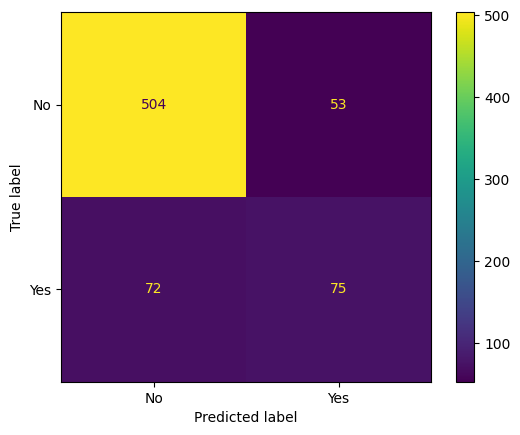

In [146]:
plt.figure(figsize=(4,4),dpi=300)
ConfusionMatrixDisplay.from_estimator(randforest_class_model,X_test,y_test)
#случайные леса

In [147]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.59      0.51      0.55       147

    accuracy                           0.82       704
   macro avg       0.73      0.71      0.72       704
weighted avg       0.81      0.82      0.82       704



In [111]:
grid_randforest_class_model.best_estimator_.feature_importances_

array([0.0142223 , 0.18901929, 0.10519743, 0.15832465, 0.01425666,
       0.01480632, 0.01248197, 0.00368597, 0.00382675, 0.01450155,
       0.0781749 , 0.00883337, 0.00946629, 0.03616656, 0.00941551,
       0.01401706, 0.00888824, 0.00976593, 0.01084889, 0.02564232,
       0.01721383, 0.01098883, 0.01510702, 0.01227194, 0.03389271,
       0.0663765 , 0.02226202, 0.0095078 , 0.0614623 , 0.00937507])

In [112]:
feat_imp = grid_randforest_class_model.best_estimator_.feature_importances_

In [118]:
imp_feat = pd.DataFrame(data=feat_imp, columns=['Importance'],index = X.columns)

In [126]:
imp_feat = imp_feat.sort_values('Importance')
imp_feat

,Importance
PhoneService_Yes,0.003686
MultipleLines_No phone service,0.003827
InternetService_No,0.008833
DeviceProtection_No internet service,0.008888
PaymentMethod_Mailed check,0.009375
OnlineBackup_No internet service,0.009416
OnlineSecurity_No internet service,0.009466
PaymentMethod_Credit card (automatic),0.009508
DeviceProtection_Yes,0.009766
TechSupport_No internet service,0.010849


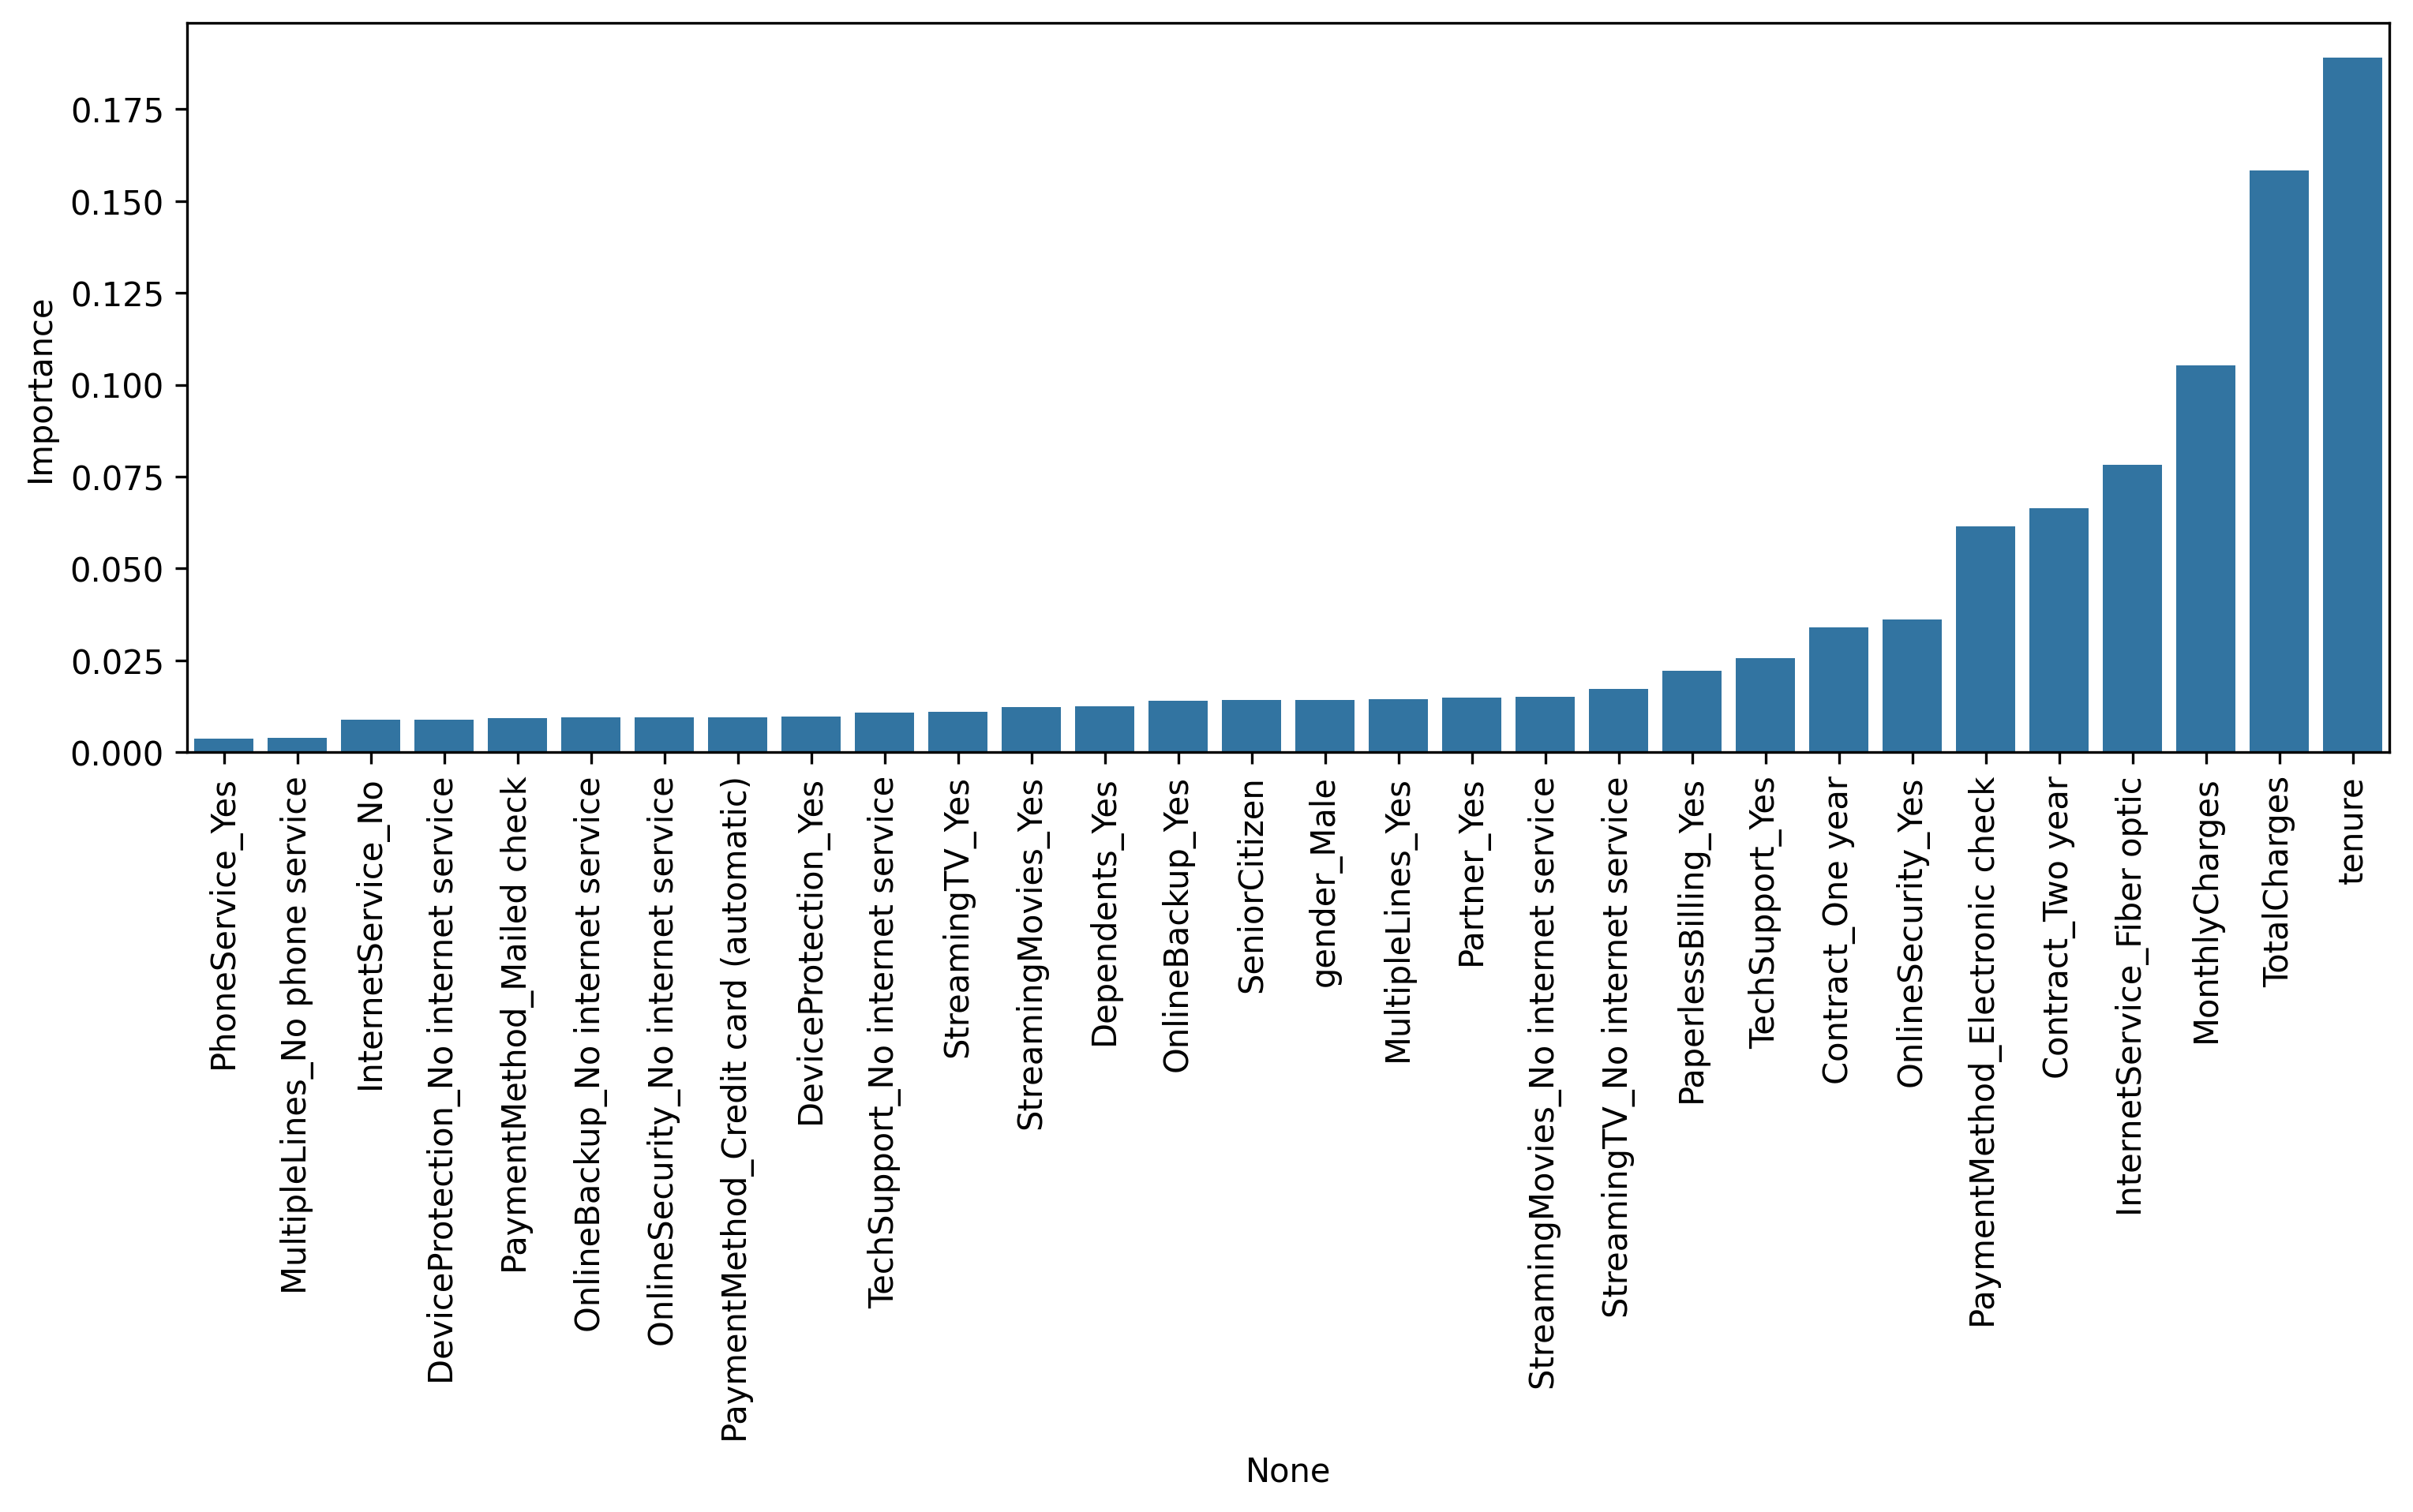

In [127]:
plt.figure(figsize=(12,4),dpi=300)
sns.barplot(data=imp_feat,x=imp_feat.index,y='Importance')
plt.xticks(rotation=90);

In [128]:
from joblib import dump, load

In [134]:
dump(randforest_class_model,'randforest_class_model.joblib')
#наша модель

['randforest_class_model.joblib']

In [142]:
#для визуализации точности модели
def my_foo_viz(model,X_test,y_test):
    y_preds = model.predict(X_test)
    plt.figure(figsize=(4,4),dpi=300)
    ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
    print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.59      0.51      0.55       147

    accuracy                           0.82       704
   macro avg       0.73      0.71      0.72       704
weighted avg       0.81      0.82      0.82       704



<Figure size 1200x1200 with 0 Axes>

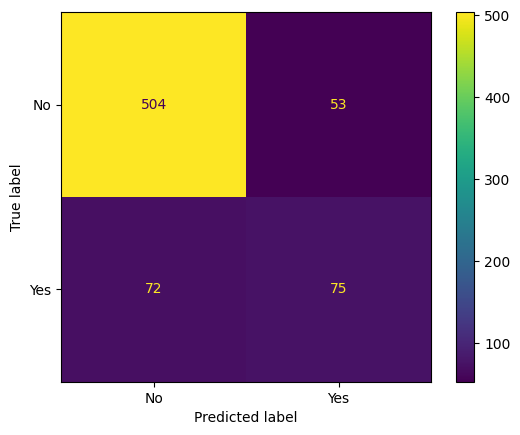

In [143]:
my_foo_viz(randforest_class_model, X_test, y_test)
#случайные леса

In [163]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [149]:
tree_model = DecisionTreeClassifier()

In [157]:
param_grid2 = {'max_depth':(1,5,10,30,50,100,500,1000),
               'min_samples_split':(2,5,10,20), 
               'min_samples_leaf':(5,10,20,50),
               'max_features':(1,2,3,5,10,20,30,50,100)}

In [158]:
grid_tree_model = GridSearchCV(param_grid=param_grid2, estimator=tree_model, verbose = 4)

In [159]:
grid_tree_model.fit(X_train,y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[CV 1/5] END max_depth=1, max_features=1, min_samples_leaf=5, min_samples_split=2;, score=0.728 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=1, min_samples_leaf=5, min_samples_split=2;, score=0.727 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=1, min_samples_leaf=5, min_samples_split=2;, score=0.727 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=1, min_samples_leaf=5, min_samples_split=2;, score=0.728 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=1, min_samples_leaf=5, min_samples_split=2;, score=0.728 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=1, min_samples_leaf=5, min_samples_split=5;, score=0.728 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=1, min_samples_leaf=5, min_samples_split=5;, score=0.727 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=1, min_samples_leaf=5, min_samples_split=5;, score=0.727 total time=   0.0s
[CV 4/5] END ma

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': (1, 5, 10, 30, 50, 100, 500, 1000),
                         'max_features': (1, 2, 3, 5, 10, 20, 30, 50, 100),
                         'min_samples_leaf': (5, 10, 20, 50),
                         'min_samples_split': (2, 5, 10, 20)},
             verbose=4)

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.54      0.49      0.51       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



<Figure size 1200x1200 with 0 Axes>

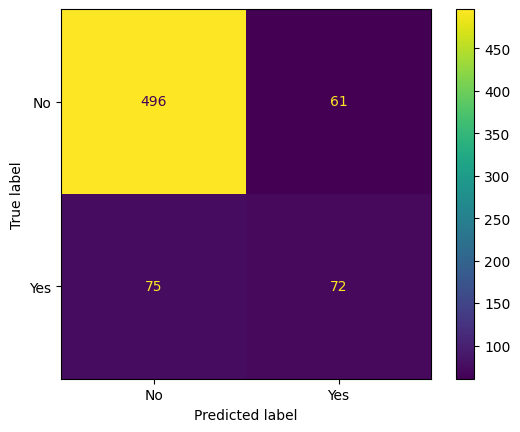

In [161]:
my_foo_viz(grid_tree_model, X_test, y_test)
#дерево решений

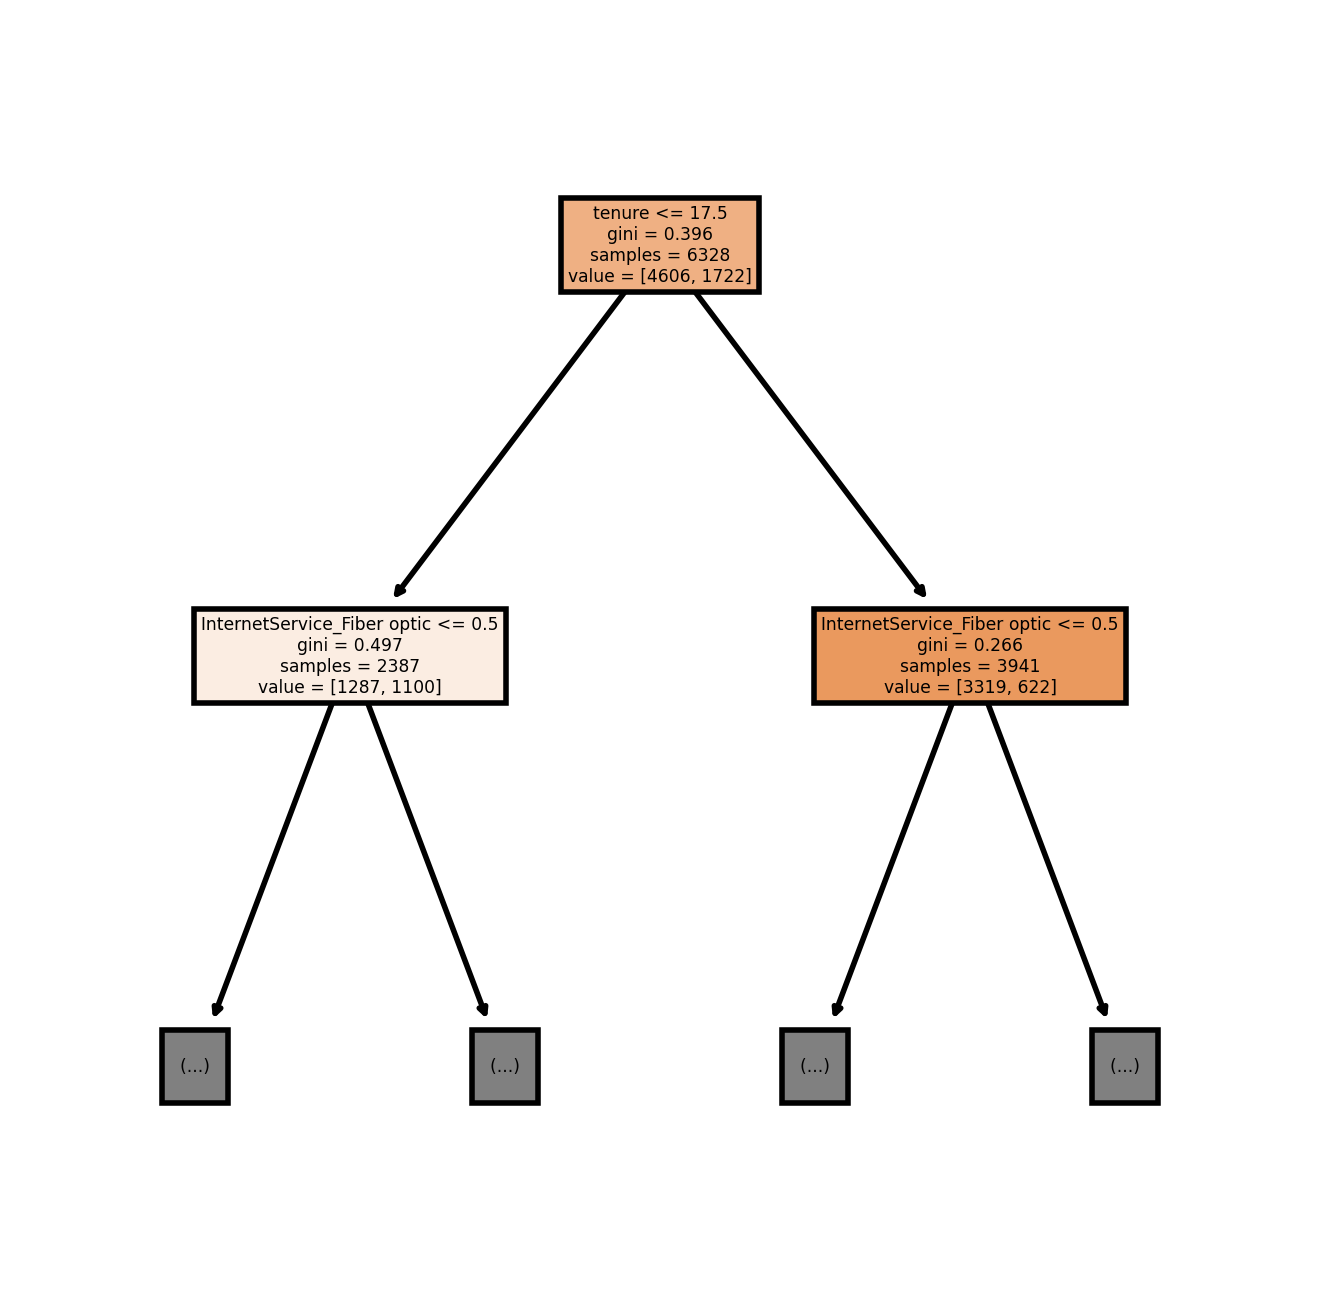

In [185]:
plt.figure(figsize=(4,4),dpi=400)
plot_tree(grid_tree_model.best_estimator_,filled=True,max_depth=1,feature_names=X.columns);

In [227]:
dump(grid_tree_model,'grid_tree_model.joblib')

['grid_tree_model.joblib']

In [186]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [188]:
wong_model = AdaBoostClassifier()
gradient_tree_model = GradientBoostingClassifier()

In [197]:
ada_param_grid = {'n_estimators':(10,40,50,100,150,300),
                  'learning_rate':(0.1,0.5,1.0,2.0,10.0)}
gradient_tree_param_grid = {'learning_rate':(0.1,0.2,0.5,0.6,0.99),
                 'n_estimators':(20,50,100),
                 'max_depth':(3,4,7,10,15)}

In [198]:
grid_ada_model = GridSearchCV(estimator=wong_model,param_grid=ada_param_grid, verbose = 4)
grid_gradient_tree_model = GridSearchCV(estimator=gradient_tree_model, param_grid=gradient_tree_param_grid, verbose = 4)

In [199]:
grid_ada_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END learning_rate=0.1, n_estimators=10;, score=0.728 total time=   0.1s
[CV 2/5] END learning_rate=0.1, n_estimators=10;, score=0.727 total time=   0.1s
[CV 3/5] END learning_rate=0.1, n_estimators=10;, score=0.727 total time=   0.1s
[CV 4/5] END learning_rate=0.1, n_estimators=10;, score=0.745 total time=   0.1s
[CV 5/5] END learning_rate=0.1, n_estimators=10;, score=0.728 total time=   0.1s
[CV 1/5] END learning_rate=0.1, n_estimators=40;, score=0.781 total time=   0.3s
[CV 2/5] END learning_rate=0.1, n_estimators=40;, score=0.788 total time=   0.3s
[CV 3/5] END learning_rate=0.1, n_estimators=40;, score=0.784 total time=   0.3s
[CV 4/5] END learning_rate=0.1, n_estimators=40;, score=0.762 total time=   0.3s
[CV 5/5] END learning_rate=0.1, n_estimators=40;, score=0.790 total time=   0.3s
[CV 1/5] END learning_rate=0.1, n_estimators=50;, score=0.783 total time=   0.4s
[CV 2/5] END learning_rate=0.1, n_estimators=50

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': (0.1, 0.5, 1.0, 2.0, 10.0),
                         'n_estimators': (10, 40, 50, 100, 150, 300)},
             verbose=4)

In [200]:
grid_gradient_tree_model.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=20;, score=0.791 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=20;, score=0.798 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=20;, score=0.796 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=20;, score=0.780 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=20;, score=0.801 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.803 total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.802 total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.805 total time=   0.3s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.787 total time=   0.3s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.809 total time=   0.3

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': (0.1, 0.2, 0.5, 0.6, 0.99),
                         'max_depth': (3, 4, 7, 10, 15),
                         'n_estimators': (20, 50, 100)},
             verbose=4)

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



<Figure size 1200x1200 with 0 Axes>

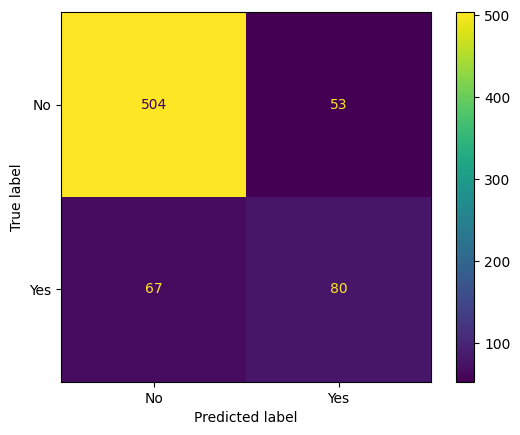

In [201]:
my_foo_viz(grid_ada_model, X_test, y_test)
#адаптивный бустинг ансамбля

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



<Figure size 1200x1200 with 0 Axes>

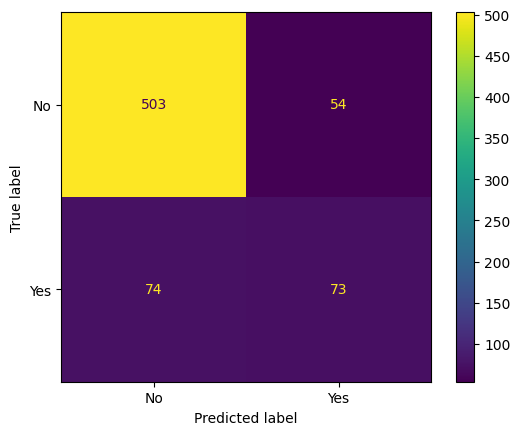

In [202]:
my_foo_viz(grid_gradient_tree_model, X_test, y_test)
#градиентный бустинг ансабля

In [205]:
feat_imp1 = grid_ada_model.best_estimator_.feature_importances_

In [207]:
feat_imp2 = grid_gradient_tree_model.best_estimator_.feature_importances_

In [219]:
imp_feat1 = pd.DataFrame(data=feat_imp1, columns=['Importance'],index = X.columns).sort_values('Importance')
imp_feat1 = imp_feat1[imp_feat1['Importance']>0.001]

In [222]:
imp_feat2 = pd.DataFrame(data=feat_imp2, columns=['Importance'],index = X.columns).sort_values('Importance')
imp_feat2 = imp_feat2[imp_feat2['Importance']>0.001]

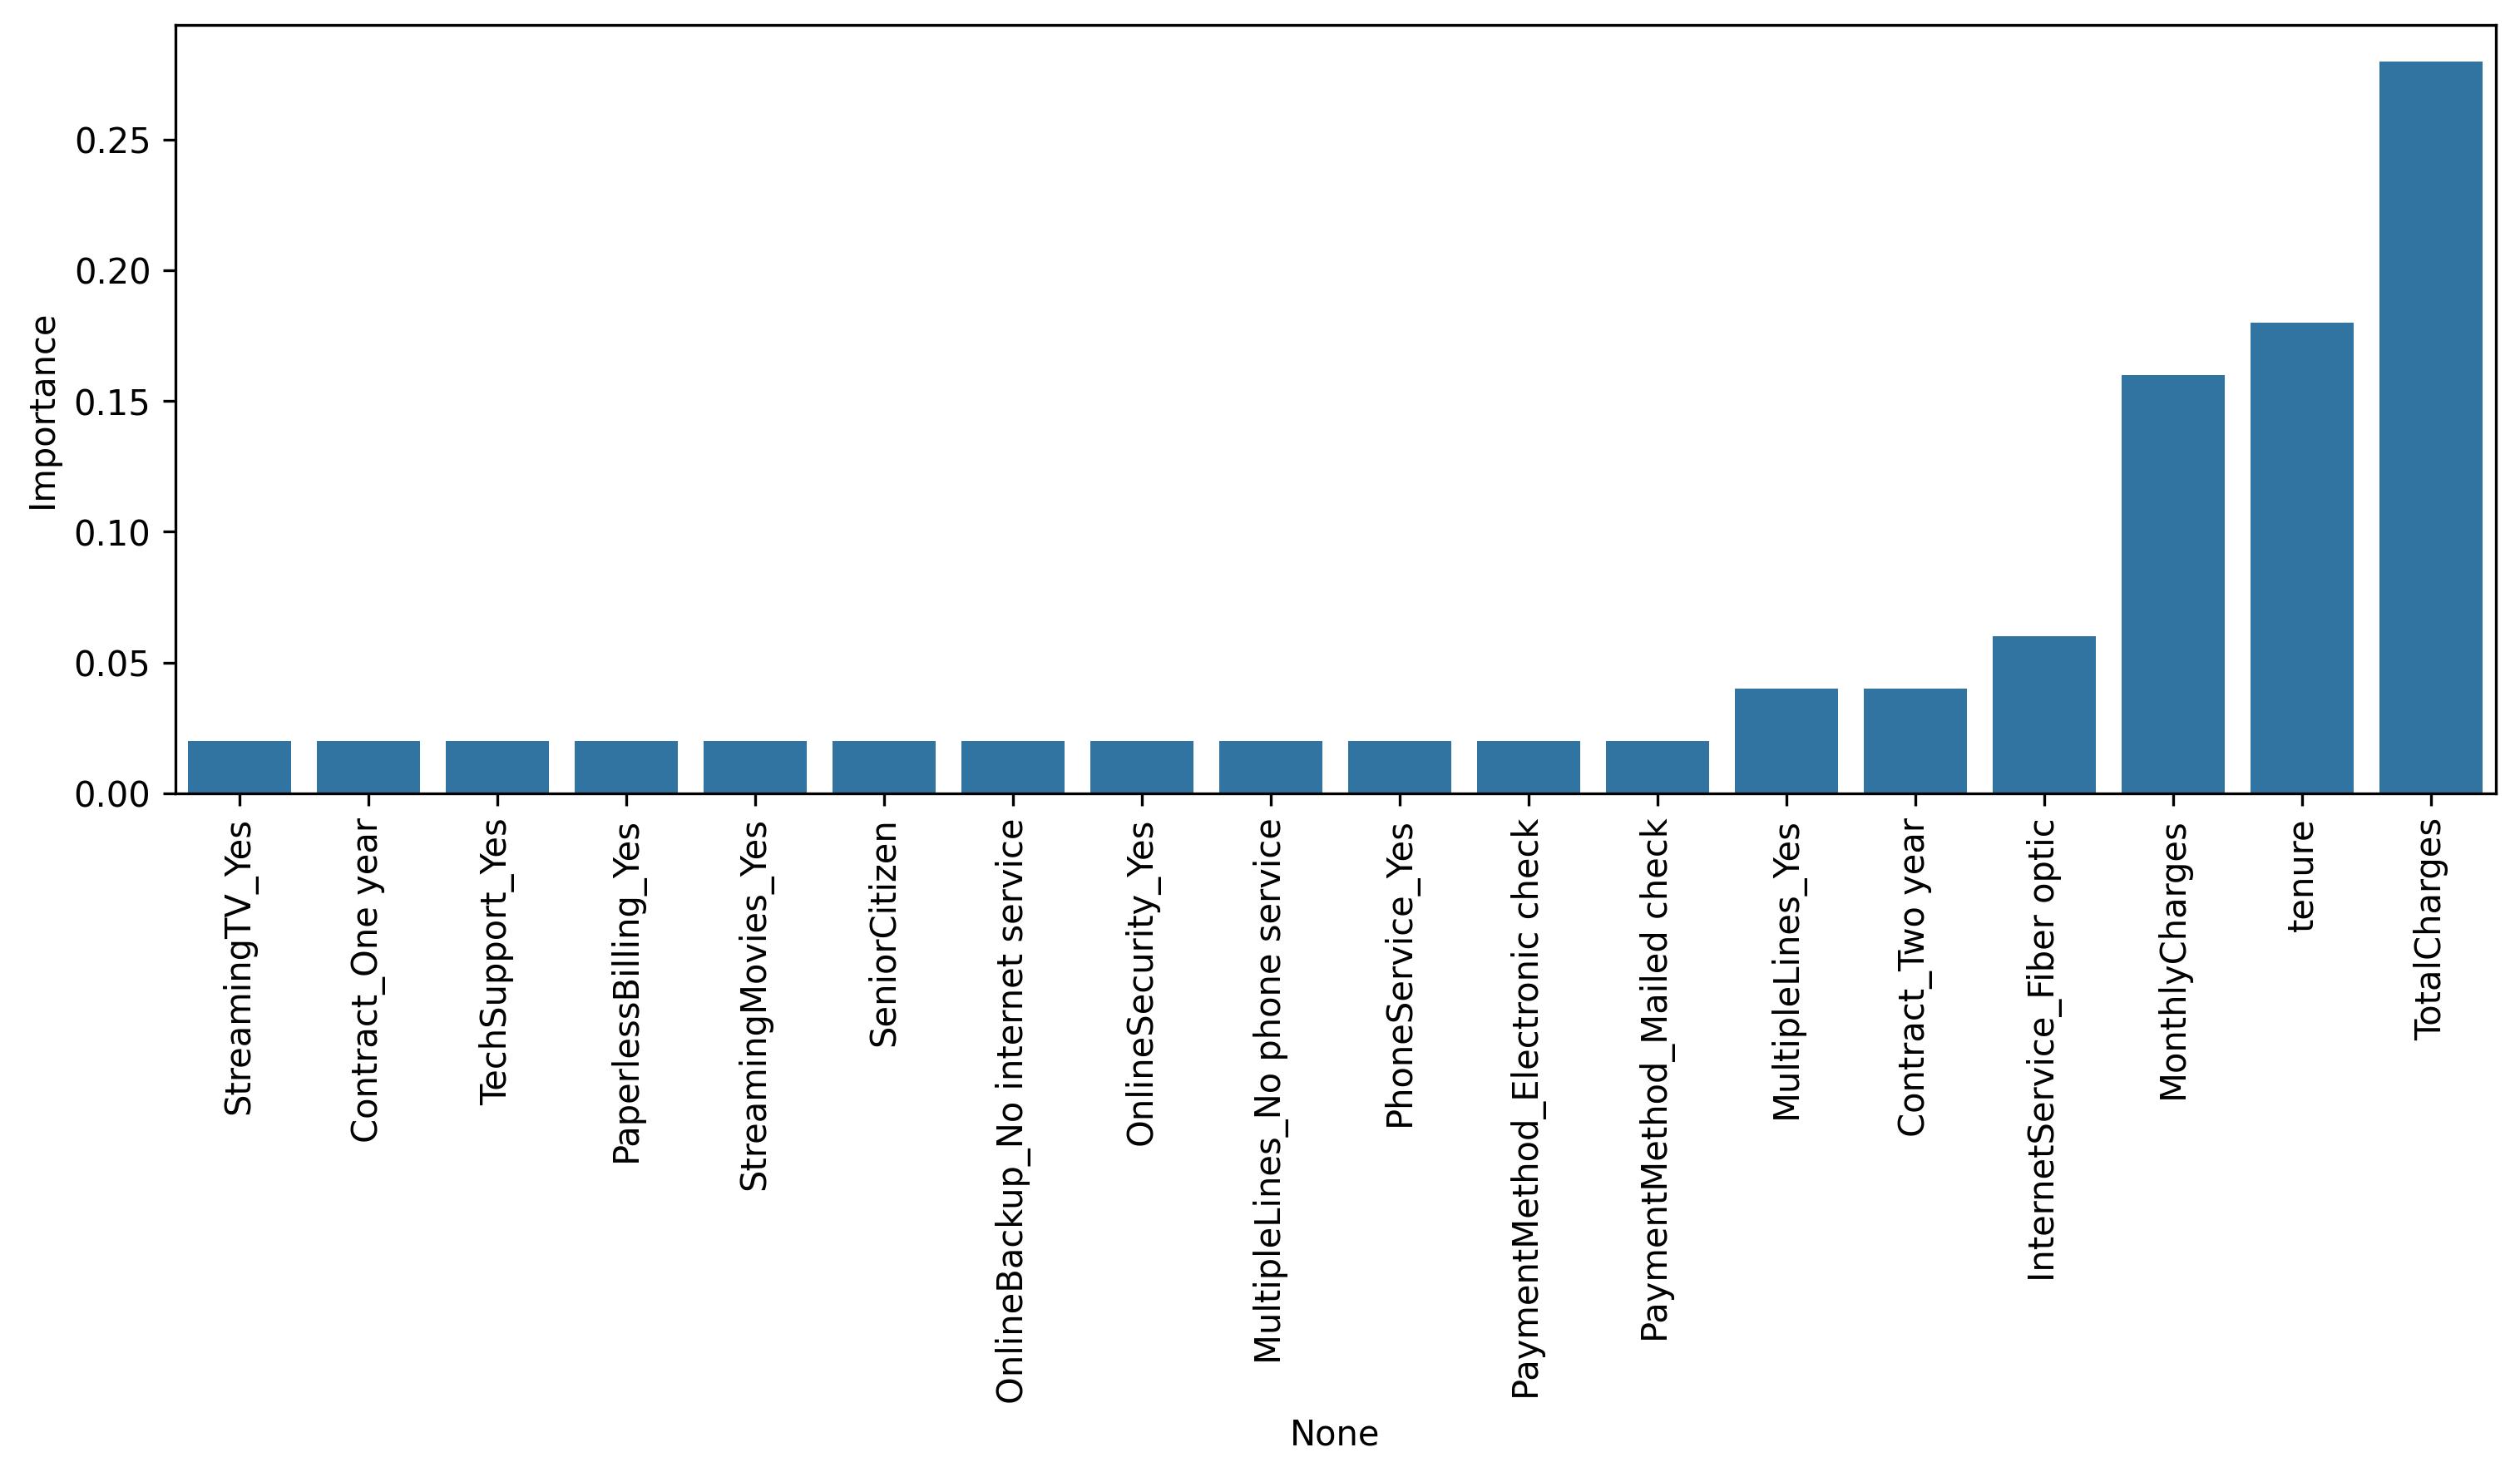

In [221]:
plt.figure(figsize=(12,4),dpi=300)
sns.barplot(data=imp_feat1,x=imp_feat1.index,y='Importance')
plt.xticks(rotation=90);

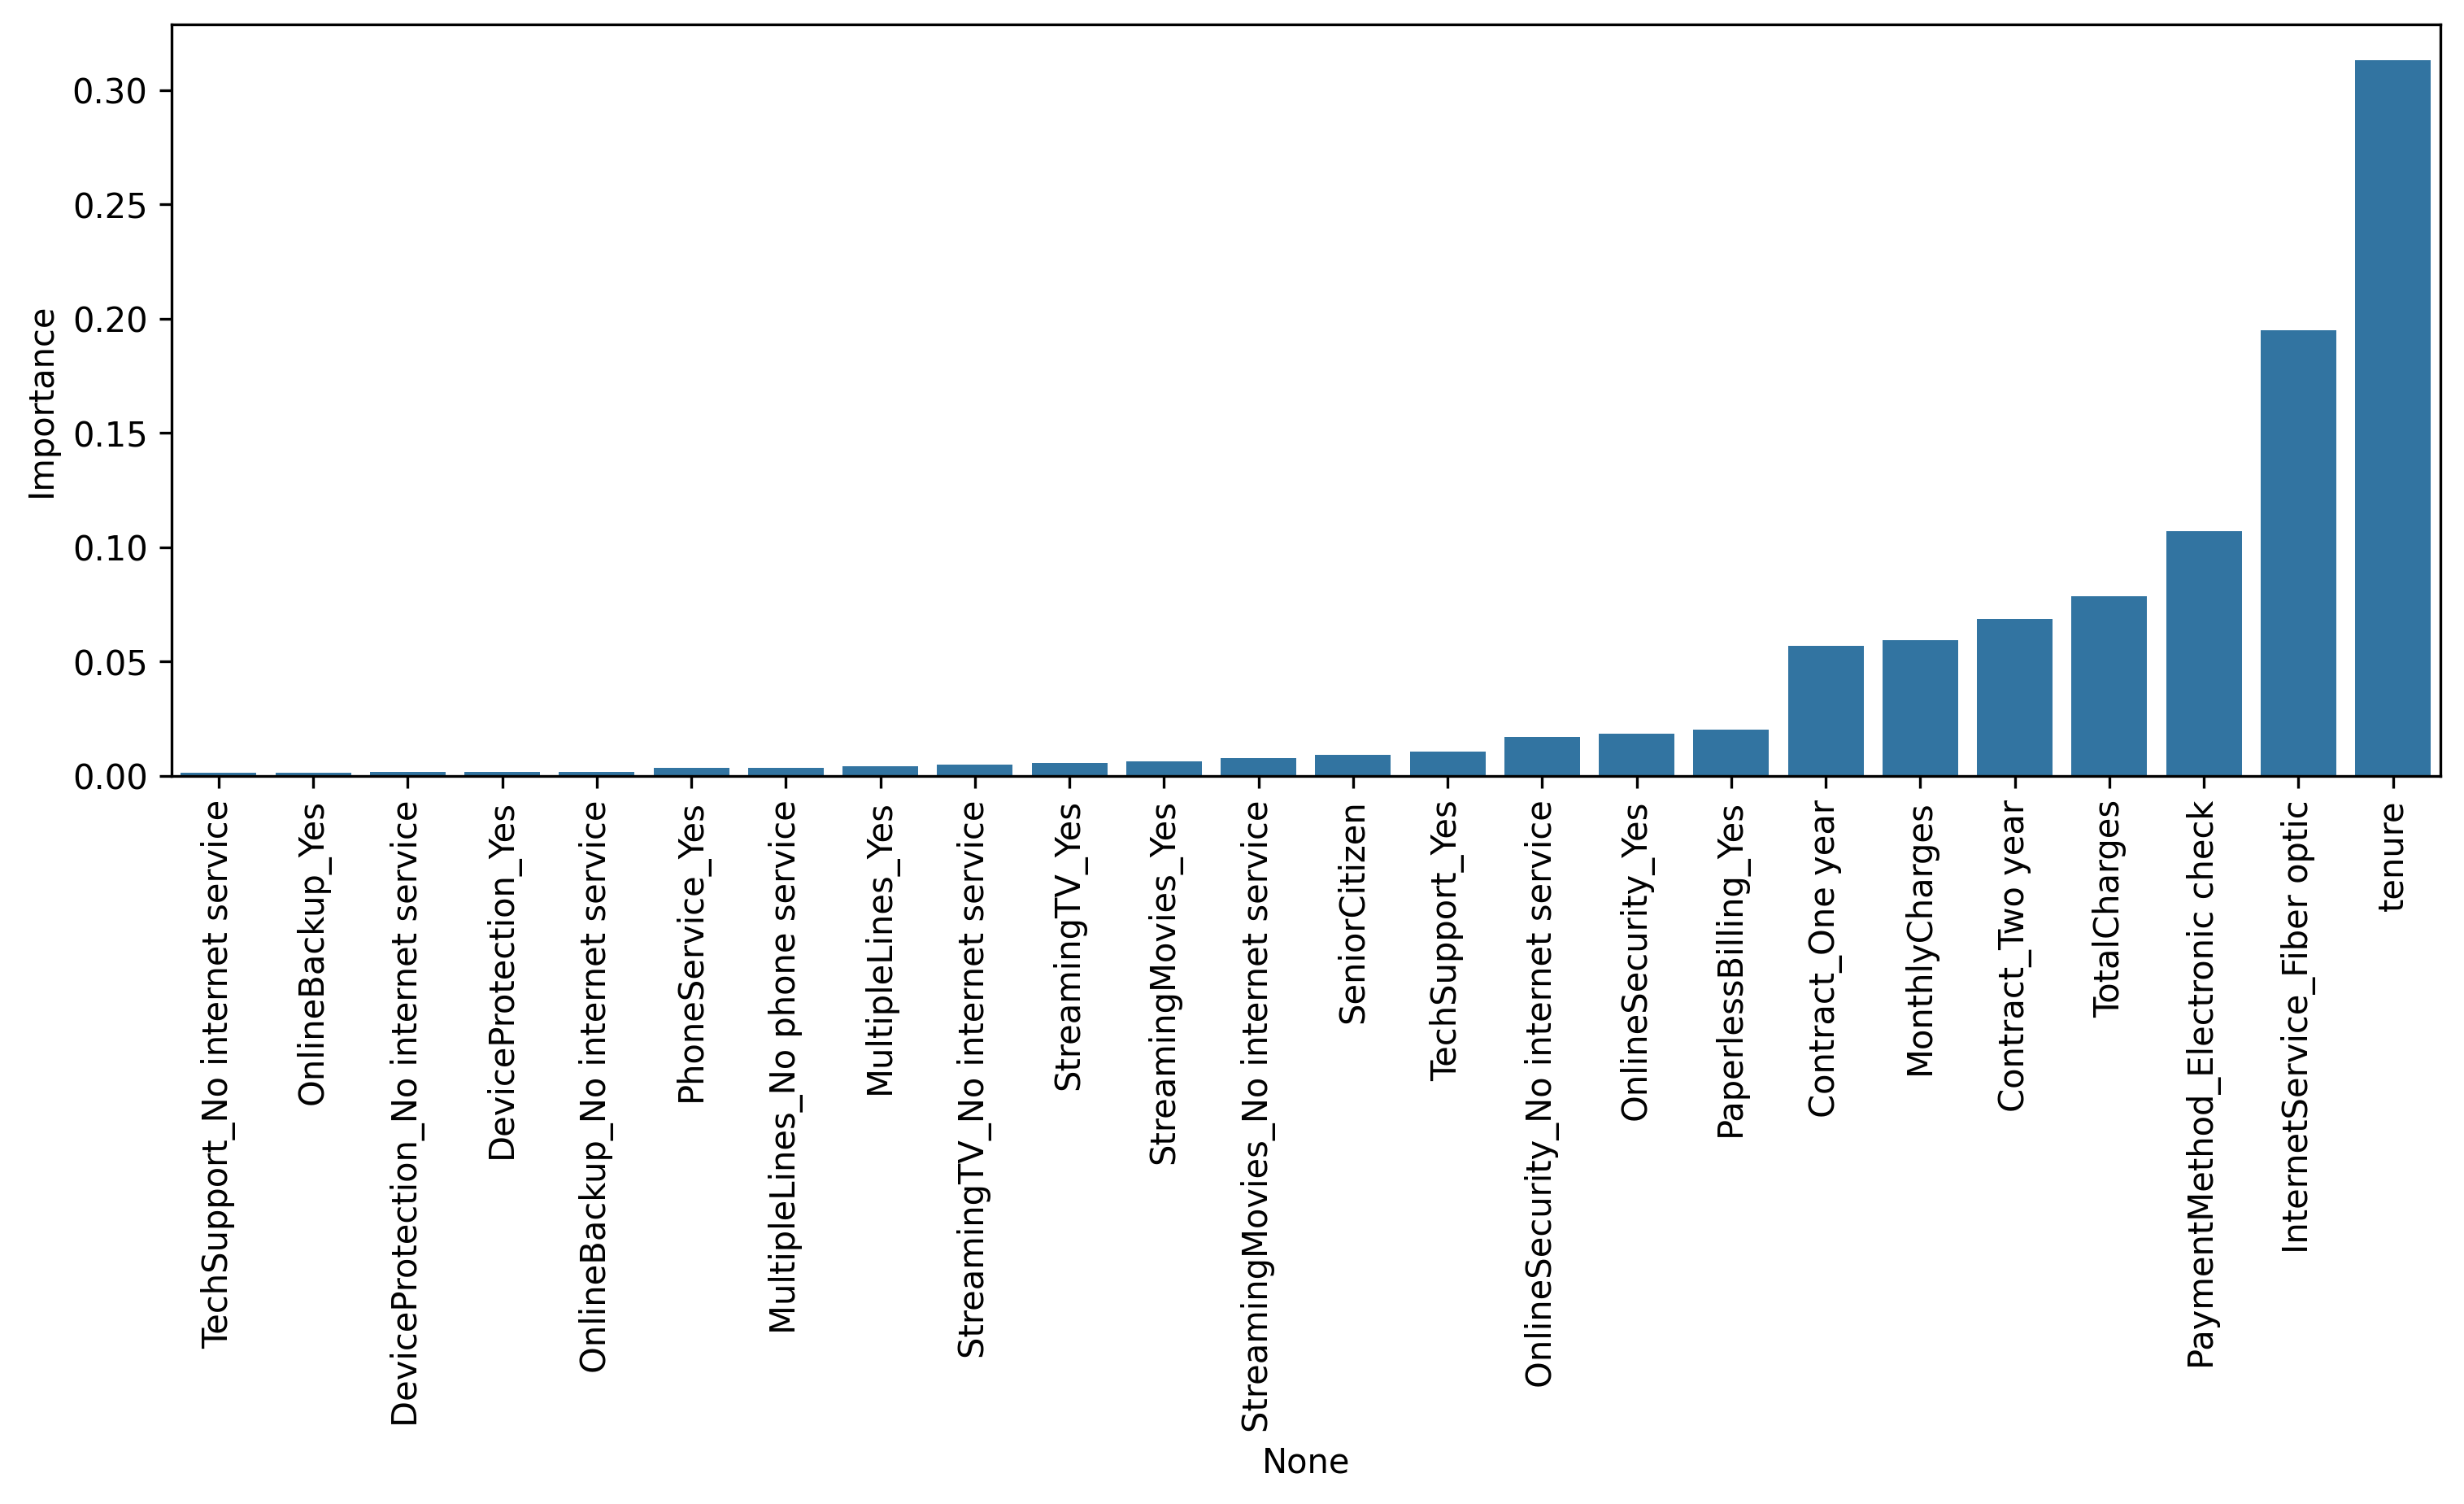

In [223]:
plt.figure(figsize=(12,4),dpi=300)
sns.barplot(data=imp_feat2,x=imp_feat2.index,y='Importance')
plt.xticks(rotation=90);

In [229]:
dump(grid_ada_model, 'grid_ada_model.joblib')

['grid_ada_model.joblib']

In [230]:
dump(grid_gradient_tree_model, 'grid_gradient_tree_model.joblib')

['grid_gradient_tree_model.joblib']

In [1]:
#knn